In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

# La distribución de los datos

## ¿Alguna vez has escuchado que el famoso IQ (Coeficiente intelectual) sigue una distribución normal?

Una buena forma de tener una noción de como se comporta algo es a través de gráficar los datos. Esto nos permite ver si los datos se aproximan a algunas de las funciones de distribución que son estudiadas en estadística, y con ello poder realizar operaciones matemáticas y analíticas.


Vamos a introducir esto a través del siguiente dataset (Este es un dataset sintético y no refleja la realidad. Es solo con fines pedagógicos) 

In [2]:
df = pd.read_csv('IQ_level.csv')
df

,IQ,Preferencia,Género,Estatura (cm)
0,90,Té,Masculino,161.629377
1,107,Té,Femenino,170.519938
2,115,Café,Masculino,178.653835
3,101,Té,Masculino,154.791488
4,96,Té,Femenino,152.199509
...,...,...,...,...
995,103,Té,Femenino,128.287721
996,121,Café,Masculino,176.141165
997,91,Té,Masculino,139.896586
998,102,Té,Femenino,130.860996


### Puesto que el gráfico de una distribución normal considera en el eje X la variable que nos interesa evaluar (IQ) y en el eje Y la frecuencia de cada dato, es que podemos utilizar un [Histograma](https://www.w3schools.com/python/matplotlib_histograms.asp)

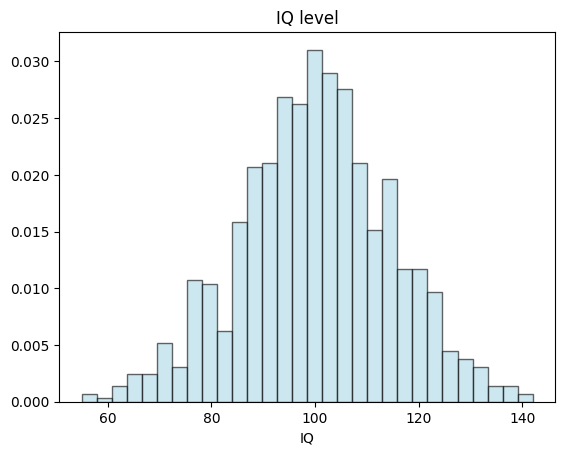

In [3]:
fig, ax = plt.subplots()
plt.hist(df['IQ'], bins=30, edgecolor='black', density=True, alpha=0.6, color='lightblue')
plt.title('IQ level')
plt.xlabel('IQ')

plt.show()


### E inclusive podemos agregar una curva para ver la forma a la que tiende.

La fórmula de la distribución normal es:

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

In [4]:
def normal_pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

## Graficamos

Media: 100.08
Desviación Estándar: 14.59159054094222
el mínimo es55, y el máximo es 142


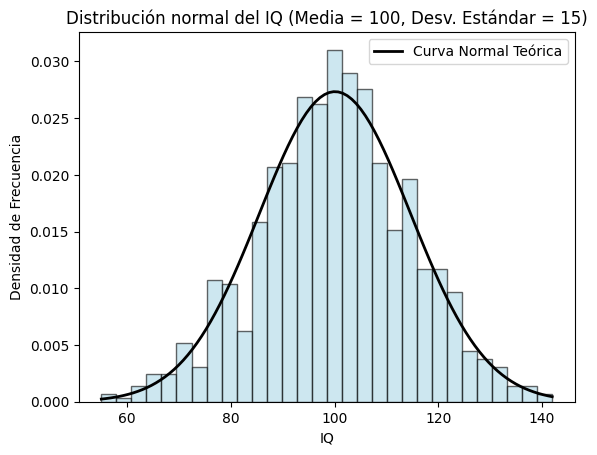

In [5]:
plt.hist(df['IQ'], bins=30, edgecolor='black', density=True, alpha=0.6, color='lightblue')

## Para ello debemos primero encontrar la media y la desviación estándar de la muestra
media = df['IQ'].mean()
desviacion_estandar = df['IQ'].std()

print('Media:', media)
print('Desviación Estándar:', desviacion_estandar)

# Esta parte del código es para dibujar la curva de distribución normal 
# (Más información en: https://stackoverflow.com/questions/35544233/fit-a-curve-to-a-histogram-in-python)
xmin, xmax = min(df['IQ']), max(df['IQ']) # Mínimo y máximo de los datos. Sirve para encontrar el intervalo de la curva
print(f'el mínimo es{xmin}, y el máximo es {xmax}') # Esto es solo debugging. Puedes borrarlo si quieres
x = np.linspace(xmin, xmax, 100) # Generar 100 puntos entre el mínimo y el máximo
p = normal_pdf(x, media, desviacion_estandar) # Calcular la función de densidad de probabilidad (por eso se llama pdf)


# Dibujar la curva de distribución normal sobre el histograma
plt.plot(x, p, 'k', linewidth=2, label='Curva Normal Teórica')


plt.title('Distribución normal del IQ (Media = 100, Desv. Estándar = 15)')
plt.xlabel('IQ')
plt.ylabel('Densidad de Frecuencia')
plt.legend()


## Graficando datos categóricos

Probemos el boxplot de Seaborn, una librería que tiene gráficos más estéticos que matplotlib.



## Boxplot

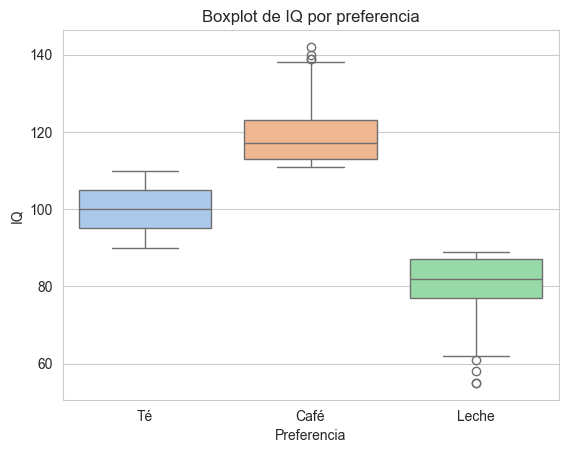

In [6]:
import seaborn as sns

sns.set_style("whitegrid")
sns.boxplot(x = df['Preferencia'], y = df['IQ'], palette = 'pastel', hue=df['Preferencia'])
plt.title('Boxplot de IQ por preferencia')
plt.show()

## ¿ Qué puedes interpretar del IQ y la elección de bebestible?

## KDEplot

Este gráfico permite obtener la función de densidad (Similar a como lo hicimos anteriormente usando numpy y matplotlib).

Solo recibe un parámetro ya que en el eje Y siempre va la frecuencia de los datos ingresados.

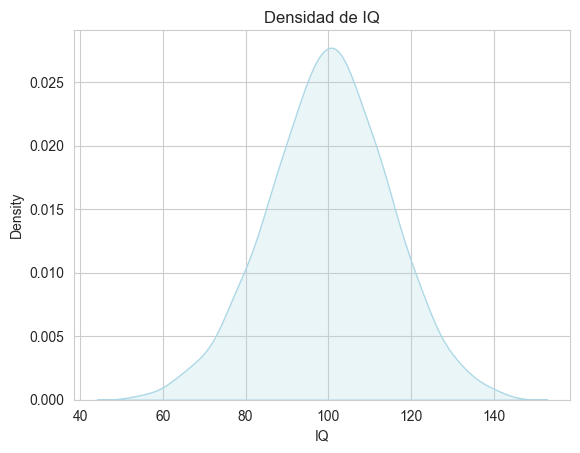

In [7]:
sns.kdeplot(df['IQ'], color='lightblue', fill=True)
plt.title('Densidad de IQ')
plt.show()


## Heatmap

es una forma de representar los resultados del coeficiente de Pearson usando una matriz con colores.


In [8]:
dummy = pd.get_dummies(df[['Preferencia', 'Género']])
dummy = dummy.applymap(lambda x: 1 if x == True else 0) 
df = pd.concat([df, dummy], axis=1)
df = df.drop('Preferencia', axis=1)
df = df.drop('Género', axis=1)
df

/var/folders/z2/flhcyvts0wx4h743w2gy_yxm0000gn/T/ipykernel_24266/2159591007.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dummy = dummy.applymap(lambda x: 1 if x == True else 0)


,IQ,Estatura (cm),Preferencia_Café,Preferencia_Leche,Preferencia_Té,Género_Femenino,Género_Masculino
0,90,161.629377,0,0,1,0,1
1,107,170.519938,0,0,1,1,0
2,115,178.653835,1,0,0,0,1
3,101,154.791488,0,0,1,0,1
4,96,152.199509,0,0,1,1,0
...,...,...,...,...,...,...,...
995,103,128.287721,0,0,1,1,0
996,121,176.141165,1,0,0,0,1
997,91,139.896586,0,0,1,0,1
998,102,130.860996,0,0,1,1,0


<Axes: >

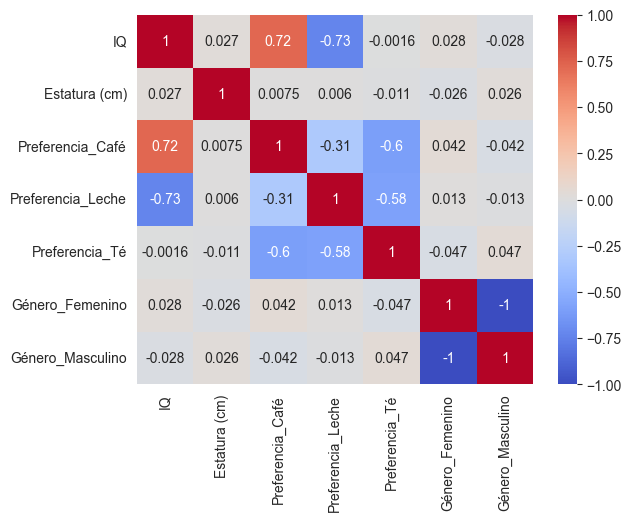

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
